In [1]:
# importing necessary modules

import os
import sys

# %load_ext autoreload
# %autoreload 2
if os.path.abspath('../lib') not in sys.path:
    sys.path.insert(0, os.path.abspath('../lib'))
    
import util_for_2d_features as util

import pandas as pd
import numpy as np

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


## Exploring Features Provided by Librosa

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_path = pd.read_csv(os.path.join(os.path.abspath('..'), 'data', 'data_path.csv'))
data_path

,Emotions,Path
0,angry,c:\Users\WHNP83\Documents\GitHub\major-project...
1,disgust,c:\Users\WHNP83\Documents\GitHub\major-project...
2,fear,c:\Users\WHNP83\Documents\GitHub\major-project...
3,happy,c:\Users\WHNP83\Documents\GitHub\major-project...
4,neutral,c:\Users\WHNP83\Documents\GitHub\major-project...
...,...,...
12202,surprise,c:\Users\WHNP83\Documents\GitHub\major-project...
12203,surprise,c:\Users\WHNP83\Documents\GitHub\major-project...
12204,surprise,c:\Users\WHNP83\Documents\GitHub\major-project...
12205,surprise,c:\Users\WHNP83\Documents\GitHub\major-project...


In [4]:
y, sr = librosa.load(data_path['Path'][0])

### Chroma STFT

`energy (magnitude) spectrum instead of power spectrogram`

(12, 99) (1025, 99)


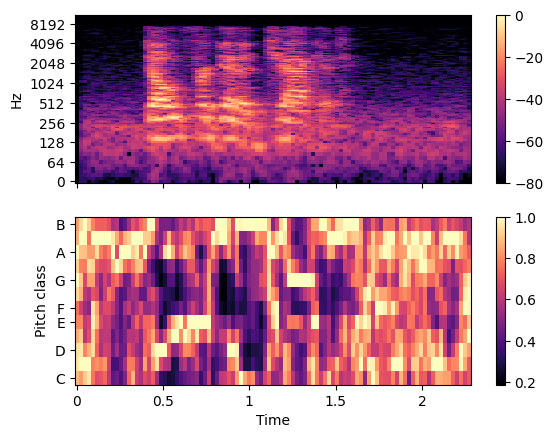

In [5]:
S = np.abs(librosa.stft(y))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
print(chroma.shape, S.shape)

util.get_chroma_stft(S, chroma)

`pre-computed power spectrogram with a larger frame`

(12, 99) (1025, 99)


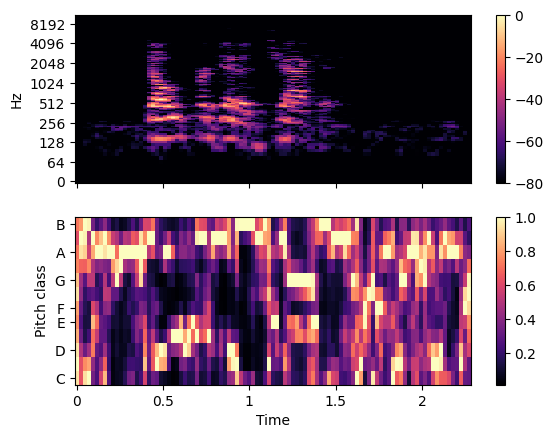

In [6]:
S = np.abs(librosa.stft(y))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
print(chroma.shape, S.shape)

util.get_chroma_stft(S, chroma)

### Mel Spectrogram

(128, 99)


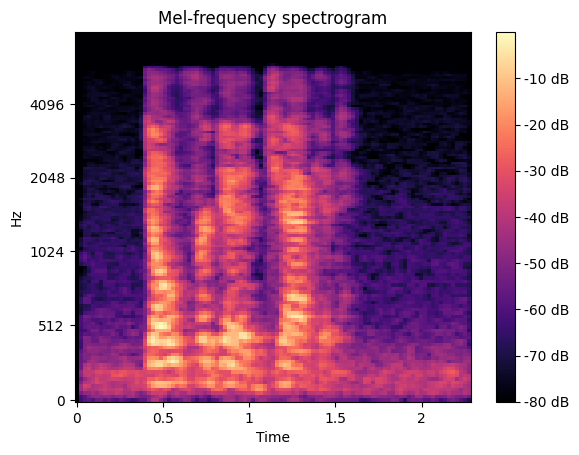

In [7]:
S = librosa.feature.melspectrogram(y = y, sr = sr)
print(S.shape)
mel_spectrogram = np.copy(S)

util.get_mel_spectrogram(S, sr)

### MFCC

(40, 99)


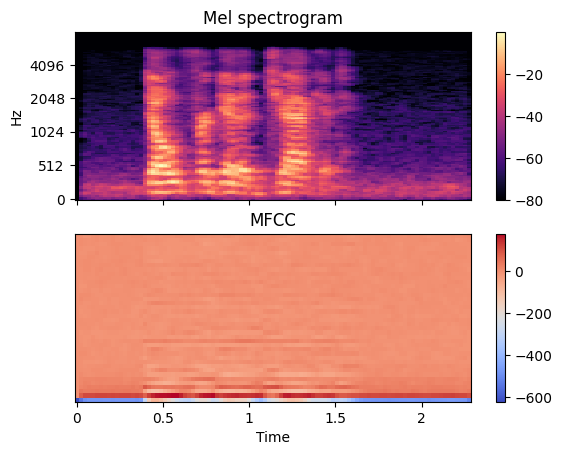

In [8]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

print(mfccs.shape)
util.get_mfcc_vs_mel_spectrogram(S, mfccs)

### Spectral Contrast

(7, 99)


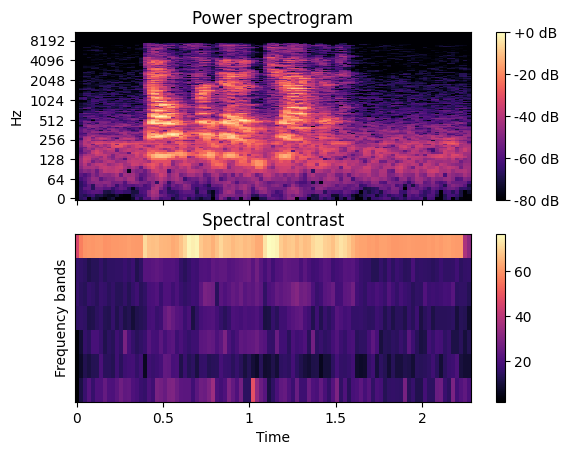

In [9]:
S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
print(contrast.shape)

util.get_spectral_contrast(S, contrast)

### Tonnetz

(6, 99)


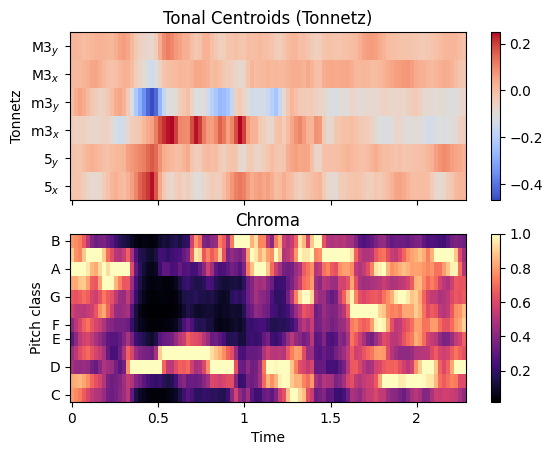

In [10]:
y = librosa.effects.harmonic(y)
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
print(tonnetz.shape)

util.get_tonnetz(y, sr, tonnetz)

### Combined features

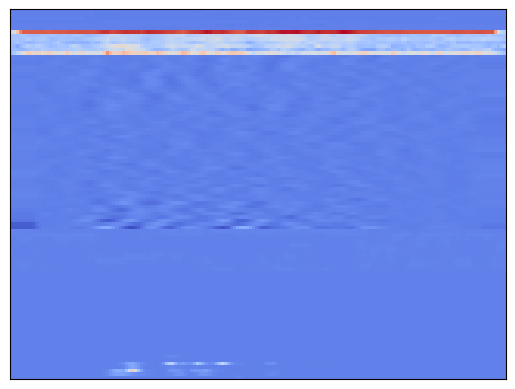

In [11]:
concatenated_features = util.get_features(y, sr)
librosa.display.specshow(concatenated_features)

In [12]:
X, Y = np.array([np.zeros((106, 160))]), np.array([])

for path, emotion in zip(data_path.Path, data_path.Emotions):
    y, sr = librosa.load(path)
    X = util.get_all_features_with_variations(y, sr, X)
    Y = np.append(Y, [emotion, emotion, emotion])

In [13]:
X = np.delete(X, 0, axis = 0)

X.shape, Y.shape

((600, 106, 160), (600,))

In [14]:
# save numpy array as npz file

# define data
data_X = np.asarray(X)
# save to npy file
to_store_at = os.path.join(os.path.abspath('..'), 'data', 'data_x.npz')
np.savez_compressed(to_store_at, data_X)

In [15]:
# save numpy array as npz file

# define data
data_y = np.asarray(Y)
# save to npy file
to_store_at = os.path.join(os.path.abspath('..'), 'data', 'data_y.npz')
np.savez_compressed(to_store_at, data_y)